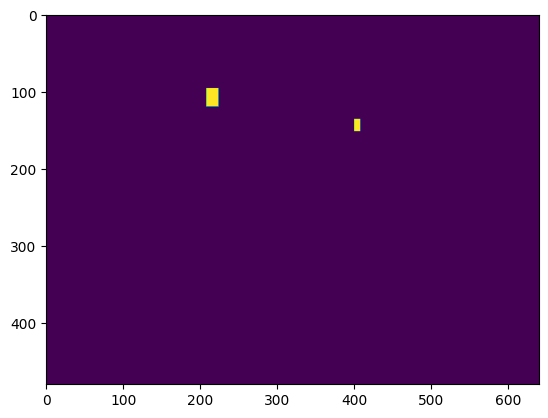

In [15]:
from PIL import Image
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tqdm
import random
import os
import torch
from torchvision import transforms

img_path = 'C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data/package_square/cut/NG_Clip_Label\\1_Cam1_000001.jpg'
org_path = img_path.replace('NG_Clip_Label', 'NG_Clip')
img = Image.open(img_path)
plt.imshow(img)

In [13]:
img_arr = np.asarray(img, dtype=np.float32)
img_arr = np.where(img_arr > 0, 255, 0)
cv2.imwrite('./sample.jpg', img_arr)

True

In [14]:
dataset_path = "C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\package_square\cut"
class_dirs = list(pathlib.Path(dataset_path).iterdir())
for class_dir in class_dirs:
    file_list = list(pathlib.Path(class_dir).iterdir())
    for file in file_list:
        if file.suffix == '.bmp':
            file.unlink(missing_ok=True)

In [24]:
mask_arr = np.asarray(Image.open(img_path), dtype=np.float32) / 255.
img_arr = np.asarray(Image.open(org_path), dtype=np.float32) / 255.

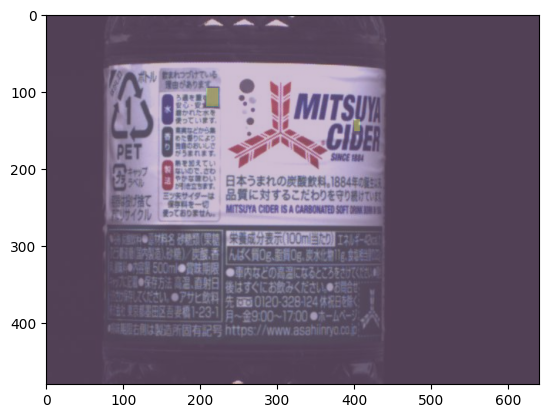

In [26]:
alpha = 0.5
plt.imshow(mask_arr, alpha=alpha)
plt.imshow(img_arr, alpha=1-alpha)

In [27]:
a = np.array([[1, 2], [54,6]])
a

array([[ 1,  2],
       [54,  6]])

In [29]:
a.tolist()

[[1, 2], [54, 6]]

In [2]:
feature_3 = torch.randn(8, 1024, 30, 40)
feature_2 = torch.randn(8, 512, 60, 80)
feature_1 = torch.randn(8, 256, 120, 160)
features = [feature_1, feature_2, feature_3]
max_shape = features[0].shape[-2:]

In [12]:
from torch.nn import functional as F
feature_2 = F.interpolate(feature_2, size=max_shape, mode='bilinear')
feature_3 = F.interpolate(feature_3, size=max_shape, mode='bilinear')
features = [feature_1, feature_2, feature_3]

In [16]:
features[0].shape

torch.Size([8, 256, 120, 160])

In [18]:
features = torch.cat(features, dim=1)

In [14]:
data_dir = "C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\package\cut"
N = 100
sample_idx = np.arange(1, 423)
random.shuffle(sample_idx)
sample_idx = sample_idx[:N]

In [25]:
test_dir = pathlib.Path(os.path.join(data_dir, 'NG_Clip'))
label_dir = pathlib.Path(os.path.join(data_dir, 'NG_Clip_Label'))

label_list = list(label_dir.glob('*.jpg'))
for idx, path in enumerate(list(test_dir.glob('*.jpg'))):
    label_path = label_list[idx]
    path_id = int(path.stem[-6:])
    if path_id in sample_idx:
        pass
    else:
        path.unlink(missing_ok=True)
        label_path.unlink(missing_ok=True)

In [23]:
int('000024')

24

In [26]:
img_dir = 'C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly_mask\glove1\\NG_Clip'
dir_path = pathlib.Path(img_dir)
list(dir_path.glob('\*.(BMP|jpg)'))

NotImplementedError: Non-relative patterns are unsupported

In [33]:
config_path = 'C:\\Users\had-int22\PycharmProjects\Pytorch_AD\FastFlow\configs\\resnet18.yaml'
import yaml
with open(config_path, 'r') as f:
    yam_file = yaml.safe_load(f)
from ast import literal_eval
input_size = literal_eval(yam_file['input_size'])


tuple

In [34]:
(1, 4)[::-1]

(4, 1)

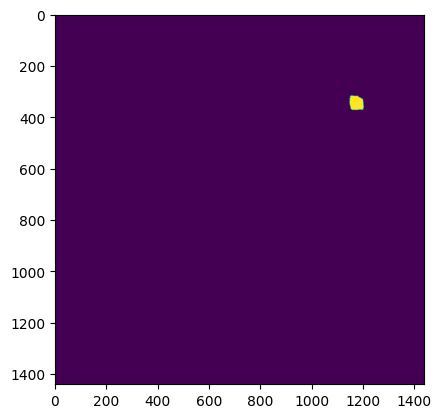

In [52]:
mask = "C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly_mask\glove95\\NG_Clip_Label\\NG_1.BMP"
img = np.asarray(Image.open(mask), 'f')

plt.imshow(img)

In [53]:
mask_b = np.where(img > 0, 255, 0)
cv2.imwrite('./masks.jpg', mask_b)

True

In [57]:
dataset_dir = pathlib.Path('C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly_mask')
class_dirs = list(dataset_dir.iterdir())
class_dirs

[WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/glove1'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/glove100'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/glove95'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/hair1'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/hair100'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/hair95'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/larva4'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/larva40'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/larva56'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/metal2'),
 WindowsPath('C:/Users/had-int22/PycharmProjects/Pytorch_AD/data/jelly_mask/metal92'),
 WindowsPath('C:/Users/had-int22/PycharmProjects

In [72]:
dataset_dir = pathlib.Path('C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly_mask')
class_dirs = list(dataset_dir.iterdir())
class_dirs

for class_dir in class_dirs:
    data_dir = class_dir / 'NG_Clip_Label'
    img_files = list(data_dir.glob('*.BMP'))
    for img_file in tqdm.tqdm(img_files):
        img_file = str(img_file)
        img = np.asarray(Image.open(img_file), dtype=np.uint8)
        img = np.where(img > 0, 255, 0)
        cv2.imwrite(img_file, img)

100%|██████████| 100/100 [00:06<00:00, 15.71it/s]


In [1]:
import timm

In [4]:
model = timm.create_model('efficientnet_b4', pretrained=True,
    features_only=True,
                          out_indices=[1, 2, 3])

In [6]:
model.feature_info.channels(
)

[32, 56, 160]

In [7]:
model.feature_info.reduction()

[4, 8, 16]